# Perkenalan

## 1. Business Problem:
### Tujuan utama dari explorasi dataset rideshare_kaggle adalah menemukan features apa yang paling mempengaruhi harga. Kemudian menggunakan features tersebut untuk menganalisa dan memprediksi harga kedepannya.

## 2. Analytical Context:
### Dataset rideshare_kaggle (https://www.kaggle.com/satyajitmaitra/linear-regression) memiliki 57 variables dan 693071 baris, dataset mengambil data dari tanggal 26-11-2018 sampai dengan 18-12-2018 dari perusahaan Uber dan Lyft. Untuk memudahkan kami hanya mengabil 10 variables yang dianggap paling berpengaruh terhadap harga.

# Import Pustaka

In [3]:
import pandas as pd # Untuk manipulasi data
import numpy as np # Untuk Operasi matematika
import matplotlib.pyplot as plt # Untuk visualisasi
import seaborn as sns # Untuk visualisasi data
from sklearn.linear_model import LinearRegression # Model machine learning

%matplotlib inline

# Data Loading

In [4]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
df.shape

(693071, 57)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [7]:
df.describe

<bound method NDFrame.describe of                                           id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

     

# Data Cleaning

In [8]:
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

In [9]:
df.isnull().values.any()

True

In [10]:
for column in df:
    if df[column].isnull().any():
       print('kolom {0} memiliki {1} null values'.format(column, df[column].isnull().sum()))

kolom price memiliki 55095 null values


In [11]:
for column in df:
    if (df[column]==0).any():
       print('kolom {0} memiliki {1} nilai 0'.format(column, (df[column]==0).sum()))

kolom hour memiliki 32413 nilai 0
kolom precipIntensity memiliki 542243 nilai 0
kolom precipProbability memiliki 542243 nilai 0
kolom cloudCover memiliki 39547 nilai 0
kolom uvIndex memiliki 533664 nilai 0
kolom precipIntensityMax memiliki 228096 nilai 0


In [12]:
df.dropna(inplace=True)

In [13]:
#df['price'].fillna((df['price'].mean()), inplace=True)

In [14]:
df.isnull().values.any()

False

In [15]:
df.shape

(637976, 57)

In [16]:
df.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028501,-0.341420,0.771245,0.000808,0.003290,0.000611,0.168295,-0.136716,-0.249027,...,-0.211887,0.999364,-0.307194,0.998195,-0.186495,0.999290,-0.378538,0.998288,-0.157891,0.999276
hour,-0.028501,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,...,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273
day,-0.341420,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,...,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546
month,0.771245,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,...,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,...,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003290,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,...,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,0.000611,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,...,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.168295,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,...,-0.047307,0.171976,-0.114437,0.169740,-0.109271,0.175336,-0.096327,0.171069,-0.082894,0.173359
longitude,-0.136716,-0.005986,0.078539,-0.126763,-0.001417,-0.000415,-0.001961,-0.531443,1.000000,0.012402,...,0.030330,-0.136620,0.048836,-0.140275,-0.007029,-0.136949,0.010131,-0.140399,-0.022605,-0.135525
temperature,-0.249027,0.218829,-0.083934,-0.082048,-0.000084,-0.002738,-0.001594,-0.098909,0.012402,1.000000,...,0.333160,-0.254755,0.789220,-0.242993,0.780426,-0.254172,0.817443,-0.231811,0.703078,-0.255578


C:\Users\HP\AppData\Local\Temp/ipykernel_800/1945449732.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

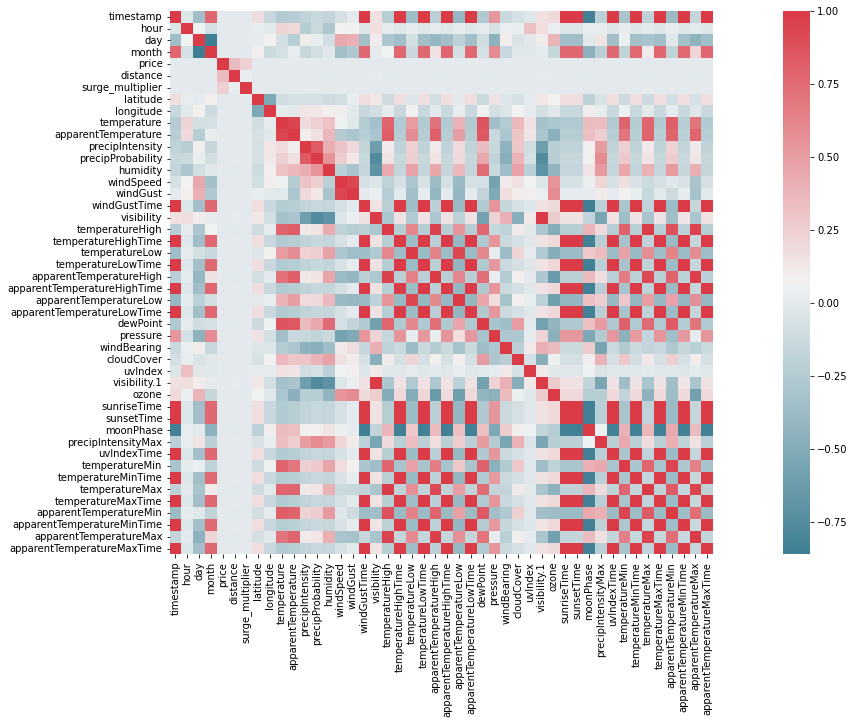

In [17]:
f, ax = plt.subplots(figsize=(25, 10))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Berdasarkan plot korelasi tersebut, kolom price hanya memiliki korelasi dengan kolom distance(jarak) dan surge_multiplier(lonjakan harga) yaitu sebesar 0.3 dan 0.2, sedangkan kolom lainnya hampir tidak memiliki korelasi (korelasi hampir 0). Oleh karena itu kolom yang digunakan adalah kolom distance dan surge_multiplier serta beberapa kolom objek yang memiliki pengaruh terhadap harga seperti hour, day, month, source, destination, cab_type, dan name

In [18]:
columns = ['hour', 'day', 'month', 'source', 'destination','cab_type', 'name', 'price', 'distance', 'surge_multiplier']
data = df[columns]

In [19]:
data.nunique()

hour                 24
day                  17
month                 2
source               12
destination          12
cab_type              2
name                 12
price               147
distance            549
surge_multiplier      7
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   day               637976 non-null  int64  
 2   month             637976 non-null  int64  
 3   source            637976 non-null  object 
 4   destination       637976 non-null  object 
 5   cab_type          637976 non-null  object 
 6   name              637976 non-null  object 
 7   price             637976 non-null  float64
 8   distance          637976 non-null  float64
 9   surge_multiplier  637976 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 53.5+ MB


In [21]:
data

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,West End,North End,Uber,WAV,9.5,1.00,1.0
693066,23,1,12,West End,North End,Uber,UberXL,13.0,1.00,1.0
693067,23,1,12,West End,North End,Uber,UberX,9.5,1.00,1.0
693069,23,1,12,West End,North End,Uber,Black SUV,27.0,1.00,1.0


C:\Users\HP\AppData\Local\Temp/ipykernel_800/641161833.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

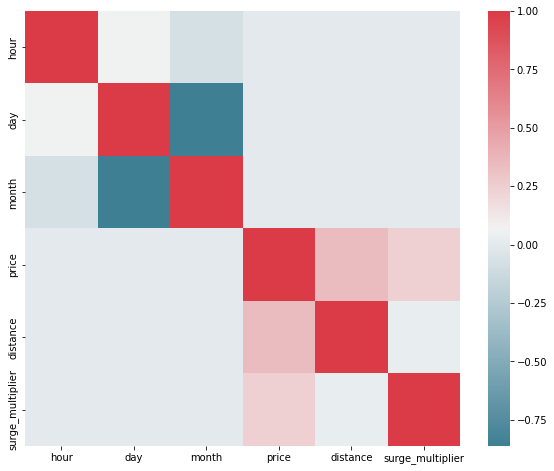

In [22]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Berdasarkan hasil visualisasi diatas predictand (price) memiliki korelasi yang lumayan dengan distance dan surge_multiplier

# Explorasi Data

In [23]:
data1 = data.groupby(by=['cab_type', 'name']).size().reset_index(name='jumlah')
data1

,cab_type,name,jumlah
0,Lyft,Lux,51235
1,Lyft,Lux Black,51235
2,Lyft,Lux Black XL,51235
3,Lyft,Lyft,51235
4,Lyft,Lyft XL,51235
5,Lyft,Shared,51233
6,Uber,Black,55095
7,Uber,Black SUV,55096
8,Uber,UberPool,55091
9,Uber,UberX,55094


In [24]:
import plotly.express as px
px.bar(data_frame=data1, x='name', y='jumlah', color='cab_type', barmode='group')

Berdasarkan hasil visualisasi diatas dapat disimpulkan bahwa jumlah dari cab_type lyft memiliki nilai yang hampir sama setiap jenis kendaraanya, begitu juga dengan cab_type Uber.

In [25]:
fig = px.pie(data_frame=data1,values='jumlah', names='cab_type')
fig.show()

Uber memiliki pengguna yang lebih banyak daripada lyft sebesar 3.6%

In [26]:
data2 = data.groupby(by=['day', 'month']).size().reset_index(name='jumlah')
data2

,day,month,jumlah
0,1,12,41680
1,2,12,41298
2,3,12,41323
3,4,12,11627
4,9,12,1529
5,10,12,2534
6,13,12,35496
7,14,12,41344
8,15,12,41332
9,16,12,41359


In [27]:
px.bar(data_frame=data2, x='day', y='jumlah', color='month', barmode='group')

Berdasarkan hasil visualisasi diatas dapat disimpulkan bahwa penggunaan aplikasi taxi online meningkat diakhir bulan yaitu diatas tanggal 25 sampai dengan tanggal 30

In [28]:
data3 = data.groupby(by=['source', 'destination']).size().reset_index(name='jumlah')
data3

,source,destination,jumlah
0,Back Bay,Boston University,8682
1,Back Bay,Fenway,8718
2,Back Bay,Haymarket Square,8838
3,Back Bay,North End,9414
4,Back Bay,Northeastern University,8825
...,...,...,...
67,West End,Fenway,9360
68,West End,Haymarket Square,8424
69,West End,North End,8478
70,West End,Northeastern University,8778


In [29]:
px.bar(data_frame=data3, x='source', y='jumlah', color='destination', barmode='group')

Berdasarkan hasil visualisasi diatas, dapat dilihat jika hampir semua skema perjalanan memiliki jumlah yang sama

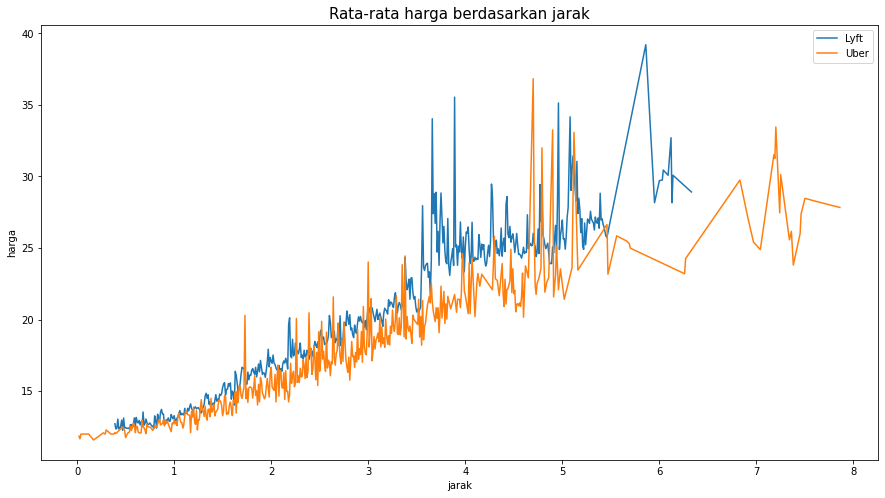

In [63]:
fig , ax = plt.subplots(figsize = (15,8))
ax.plot(data[data['cab_type'] == 'Lyft'].groupby('distance').price.mean().index, data[data['cab_type'] == 'Lyft'].groupby('distance')['price'].mean(), label = 'Lyft')
ax.plot(data[data['cab_type'] == 'Uber'].groupby('distance').price.mean().index, data[data['cab_type'] =='Uber'].groupby('distance')['price'].mean(), label = 'Uber')
ax.set_title('Rata-rata harga berdasarkan jarak', fontsize= 15)
ax.set(xlabel = 'jarak', ylabel = 'harga' )
ax.legend()
plt.show()

Berdasarkan hasil visualisasi diatas, dapat dilihat bahwa semakin tinggi jarak tempuh maka semakin besar harga maka kolom distance cocok untuk dijadikan model linear regression

# Data Preprocessing

In [31]:
data_copy = data.copy()
data_copy.reset_index(inplace=True)
data_copy

,index,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier
0,0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0
...,...,...,...,...,...,...,...,...,...,...,...
637971,693065,23,1,12,West End,North End,Uber,WAV,9.5,1.00,1.0
637972,693066,23,1,12,West End,North End,Uber,UberXL,13.0,1.00,1.0
637973,693067,23,1,12,West End,North End,Uber,UberX,9.5,1.00,1.0
637974,693069,23,1,12,West End,North End,Uber,Black SUV,27.0,1.00,1.0


In [32]:
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder()
data_copy1= pd.DataFrame(encoder.fit_transform(data_copy[['name']]).toarray())
data_copy1.columns = encoder.get_feature_names(['name'])
data_copy1

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637972,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
637973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
637974,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Kami menggunakan One Hot Encoder karena jenis categorical data yang kami punya bukan berbentuk ordinal. One Hot Encoder membantu kami untuk memberikan nilai dari setiap value pada features name yang unique

In [33]:
data_copy2 = pd.concat([data_copy, data_copy1],axis=1)
data_copy2

,index,hour,day,month,source,destination,cab_type,name,price,distance,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,693065,23,1,12,West End,North End,Uber,WAV,9.5,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637972,693066,23,1,12,West End,North End,Uber,UberXL,13.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
637973,693067,23,1,12,West End,North End,Uber,UberX,9.5,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
637974,693069,23,1,12,West End,North End,Uber,Black SUV,27.0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
data_copy2.columns

Index(['index', 'hour', 'day', 'month', 'source', 'destination', 'cab_type',
       'name', 'price', 'distance', 'surge_multiplier', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

## Membersihkan data dari outliers

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price'>

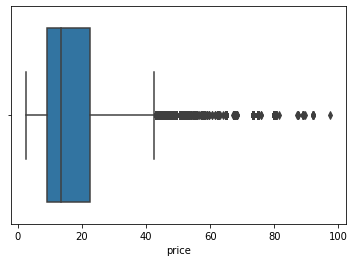

In [35]:
sns.boxplot(data_copy2['price'])

In [36]:
out = np.where(df['price']>45)
print(out[0])
print(np.count_nonzero(np.where(df['price']>45)))

[   645    646    706 ... 637813 637878 637917]
4965


In [37]:
X = data_copy2.drop(['price', 'index', 'hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name'], axis=1).values
y = data_copy2['price'].values

In [38]:
#scaler = preprocessing.MinMaxScaler().fit(x)
#X = scaler.transform(X)

In [39]:
X

array([[0.44, 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.44, 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.44, 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [1.  , 1.  , 0.  , ..., 1.  , 0.  , 0.  ],
       [1.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [40]:
y

array([ 5. , 11. ,  7. , ...,  9.5, 27. , 10. ])

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Pendefinisian Model dan Pelatihan Model

In [42]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Evaluasi Model

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test,y_pred)
print('r2 score is ',score)
print('mean_sqrd_error is',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is',np.sqrt(mean_squared_error(y_test,y_pred)))



r2 score is  0.9278177124349709
mean_sqrd_error is 6.28314977964947
root_mean_squared error of is 2.506621187904042


r2 score dari model kami memiliki nilai yang baik yaitu sekitar 0.92, hal ini mempengaruhi hasil prediksi dari model. 

In [44]:
print('Intercept of the model:',lin_reg.intercept_)
print('Coefficient of the line:',lin_reg.coef_)

Intercept of the model: 674177485.8792348
Coefficient of the line: [ 2.79112712e+00  1.83101031e+01 -6.74177490e+08 -6.74177480e+08
 -6.74177493e+08 -6.74177488e+08 -6.74177479e+08 -6.74177501e+08
 -6.74177496e+08 -6.74177504e+08 -6.74177502e+08 -6.74177501e+08
 -6.74177495e+08 -6.74177501e+08]


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value')

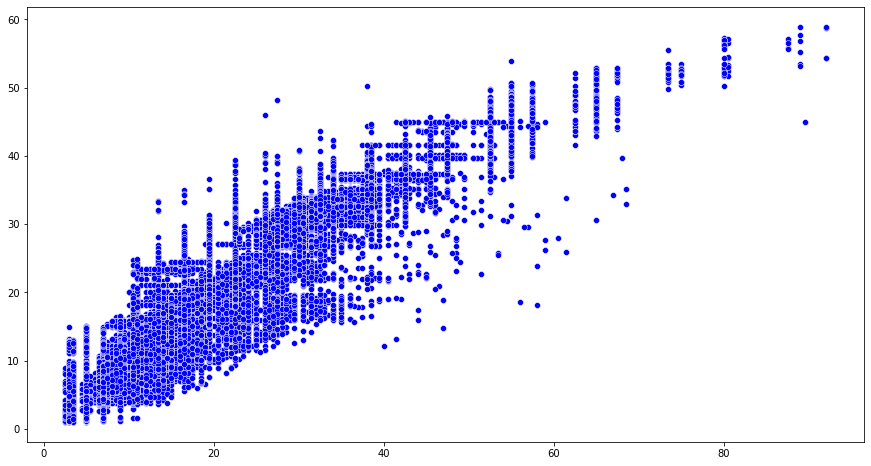

In [45]:
plt.figure(figsize=(15,8))
sns.scatterplot(y_test, y_pred, color='b')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

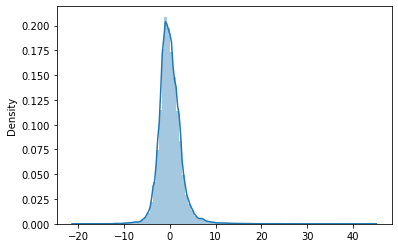

In [46]:
sns.distplot((y_test-y_pred),bins=100)

In [47]:
lin_reg.predict([[1.9, 1, 1,0,0,0,0,0,0,0,0,0,0,0]])

array([19.69740915])

In [48]:
#lin_reg.predict([[0.63636364, 1.9, 0]])

In [49]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
X[1].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [51]:
data_copy2.head()

,index,hour,day,month,source,destination,cab_type,name,price,distance,...,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Persiapan deployment model

In [52]:
#import pickle
#pickle.dump(lin_reg, open('model_linear.pkl','wb'))

In [53]:
import numpy as np
import itertools
a = 1.9, 1, [1,0,0,0,0,0,0,0,0,0,0,0]
def castToList(x): #casts x to a list
    if isinstance(x, list):
        return x
    elif isinstance(x, str):
        return [x]
    try:
        return list(x)
    except TypeError:
        return [x]
features = [castToList(x) for x in a]
new_features = list(itertools.chain.from_iterable(features))
final_features = [np.array(new_features)]
#prediction = lin_reg.predict(final_features)

In [54]:
features[2]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [55]:
features

[[1.9], [1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [56]:
len(new_features)

14

In [57]:
final_features

[array([1.9, 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. ])]

In [58]:
a = "1.9", "1", "010000000000"

In [59]:
features = [x for x in a]
new_features1 = [float(x) for x in features[0:2]]
new_features2 = [int(i) if i.isdigit() else i for i in map(str, str(features[2]))]

In [60]:
features

['1.9', '1', '010000000000']

In [61]:
new_features1

[1.9, 1.0]

In [62]:
import numpy as np
final_features = np.append(new_features1, new_features2)
final_features

array([1.9, 1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. ])

# Conclusion

### Beberapa kesimpulan yang dapat diambil dari hasil analisa adalah sebagai berikut:
1. Jarak menjadi faktor yang memiliki korelasi paling tinggi dengan harga.
2. surge_multiplier menjadi faktor kedua yang korelasinya tinggi dengan harga.
3. Tanggal 25~30 terdapat lonjakan pengguna aplikasi taxi online.
4. Jumlah jenis kendaraan yang digunakan dari setiap perusahaan hampir sama.
5. Jumlah skema perjalanan dari dan menuju hampir semuanya sama.
6. Uber memiliki pengguna yang lebih banyak daripada Lyft dengan perbedaan sebesari 3.6%